In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.datasets import fetch_mldata
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

import janitor as jn
import pandas_profiling

import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
plt.rcParams['figure.figsize'] = [16, 10]

%matplotlib inline
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-dark-palette')
cmaps = OrderedDict()

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
path = r'C:\Users\aaron\prem_league_analytics\data\ '
df = pd.read_csv(path+'fifa-all.csv')

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
jn.clean_names(df)
df.head()

,Unnamed: 0,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.00,2004-07-01,"2,021.00",87.00,92.00,92.00,96.00,39.00,66.00,nan,nan,nan,nan,nan,nan,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.00,2018-07-10,"2,022.00",90.00,93.00,82.00,89.00,35.00,78.00,nan,nan,nan,nan,nan,nan,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.00,2017-08-03,"2,022.00",91.00,85.00,87.00,95.00,32.00,58.00,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.00,2014-07-16,"2,023.00",nan,nan,nan,nan,nan,nan,87.00,92.00,78.00,89.00,52.00,90.00,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.00,2019-07-01,"2,024.00",91.00,83.00,86.00,94.00,35.00,66.00,nan,nan,nan,nan,nan,nan,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [5]:
def clean_col(name):
    return (
        name.strip().lower().replace(" ", "_")
    )
df.rename(columns=clean_col)
df.head()

,Unnamed: 0,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.00,2004-07-01,"2,021.00",87.00,92.00,92.00,96.00,39.00,66.00,nan,nan,nan,nan,nan,nan,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.00,2018-07-10,"2,022.00",90.00,93.00,82.00,89.00,35.00,78.00,nan,nan,nan,nan,nan,nan,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.00,2017-08-03,"2,022.00",91.00,85.00,87.00,95.00,32.00,58.00,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.00,2014-07-16,"2,023.00",nan,nan,nan,nan,nan,nan,87.00,92.00,78.00,89.00,52.00,90.00,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.00,2019-07-01,"2,024.00",91.00,83.00,86.00,94.00,35.00,66.00,nan,nan,nan,nan,nan,nan,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [6]:
df = df.fillna(0)
df = df.replace({'NaN': 0}, regex=True)
df.head()

,Unnamed: 0,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.00,2004-07-01,"2,021.00",87.00,92.00,92.00,96.00,39.00,66.00,0.00,0.00,0.00,0.00,0.00,0.00,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.00,2018-07-10,"2,022.00",90.00,93.00,82.00,89.00,35.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.00,2017-08-03,"2,022.00",91.00,85.00,87.00,95.00,32.00,58.00,0.00,0.00,0.00,0.00,0.00,0.00,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.00,2014-07-16,"2,023.00",0.00,0.00,0.00,0.00,0.00,0.00,87.00,92.00,78.00,89.00,52.00,90.00,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.00,2019-07-01,"2,024.00",91.00,83.00,86.00,94.00,35.00,66.00,0.00,0.00,0.00,0.00,0.00,0.00,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [7]:
df.isna().any().any()

False

In [8]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.00,2004-07-01,"2,021.00",87.00,92.00,92.00,96.00,39.00,66.00,0.00,0.00,0.00,0.00,0.00,0.00,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.00,2018-07-10,"2,022.00",90.00,93.00,82.00,89.00,35.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.00,2017-08-03,"2,022.00",91.00,85.00,87.00,95.00,32.00,58.00,0.00,0.00,0.00,0.00,0.00,0.00,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.00,2014-07-16,"2,023.00",0.00,0.00,0.00,0.00,0.00,0.00,87.00,92.00,78.00,89.00,52.00,90.00,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.00,2019-07-01,"2,024.00",91.00,83.00,86.00,94.00,35.00,66.00,0.00,0.00,0.00,0.00,0.00,0.00,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [9]:
df['attacking_crossing'] = df['attacking_crossing'].astype(str)
df['attacking_finishing'] = df['attacking_finishing'].astype(str)
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].astype(str)
df['attacking_short_passing'] = df['attacking_short_passing'].astype(str)
df['attacking_volleys'] = df['attacking_volleys'].astype(str)
df['skill_dribbling'] = df['skill_dribbling'].astype(str)
df['skill_curve'] = df['skill_curve'].astype(str)
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].astype(str)
df['skill_long_passing'] = df['skill_long_passing'].astype(str)
df['skill_ball_control'] = df['skill_ball_control'].astype(str)
df['movement_acceleration'] = df['movement_acceleration'].astype(str)
df['movement_sprint_speed'] = df['movement_sprint_speed'].astype(str)
df['movement_agility'] = df['movement_agility'].astype(str)
df['movement_reactions'] = df['movement_reactions'].astype(str)
df['movement_balance'] = df['movement_balance'].astype(str)
df['power_shot_power'] = df['power_shot_power'].astype(str)
df['power_jumping'] = df['power_jumping'].astype(str)
df['power_stamina'] = df['power_stamina'].astype(str)
df['power_strength'] = df['power_strength'].astype(str)
df['power_long_shots'] = df['power_long_shots'].astype(str)
df['mentality_aggression'] = df['mentality_aggression'].astype(str)
df['mentality_interceptions'] = df['mentality_interceptions'].astype(str)
df['mentality_positioning'] = df['mentality_positioning'].astype(str)
df['mentality_vision'] = df['mentality_vision'].astype(str)
df['mentality_penalties'] = df['mentality_penalties'].astype(str)
df['mentality_composure'] = df['mentality_composure'].astype(str)
df['defending_marking'] = df['defending_marking'].astype(str)
df['defending_standing_tackle'] = df['defending_standing_tackle'].astype(str)
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].astype(str)
df['goalkeeping_diving'] = df['goalkeeping_diving'].astype(str)
df['goalkeeping_handling'] = df['goalkeeping_handling'].astype(str)
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].astype(str)
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].astype(str)
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].astype(str)

In [10]:
df['attacking_crossing'] = df['attacking_crossing'].str[:2]
df['attacking_finishing'] = df['attacking_finishing'].str[:2]
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].str[:2]
df['attacking_short_passing'] = df['attacking_short_passing'].str[:2]
df['attacking_volleys'] = df['attacking_volleys'].str[:2]
df['skill_dribbling'] = df['skill_dribbling'].str[:2]
df['skill_curve'] = df['skill_curve'].str[:2]
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].str[:2]
df['skill_long_passing'] = df['skill_long_passing'].str[:2]
df['skill_ball_control'] = df['skill_ball_control'].str[:2]
df['movement_acceleration'] = df['movement_acceleration'].str[:2]
df['movement_sprint_speed'] = df['movement_sprint_speed'].str[:2]
df['movement_agility'] = df['movement_agility'].str[:2]
df['movement_reactions'] = df['movement_reactions'].str[:2]
df['movement_balance'] = df['movement_balance'].str[:2]
df['power_shot_power'] = df['power_shot_power'].str[:2]
df['power_jumping'] = df['power_jumping'].str[:2]
df['power_stamina'] = df['power_stamina'].str[:2]
df['power_strength'] = df['power_strength'].str[:2]
df['power_long_shots'] = df['power_long_shots'].str[:2]
df['mentality_aggression'] = df['mentality_aggression'].str[:2]
df['mentality_interceptions'] = df['mentality_interceptions'].str[:2]
df['mentality_positioning'] = df['mentality_positioning'].str[:2]
df['mentality_vision'] = df['mentality_vision'].str[:2]
df['mentality_penalties'] = df['mentality_penalties'].str[:2]
df['mentality_composure'] = df['mentality_composure'].str[:2]
df['defending_marking'] = df['defending_marking'].str[:2]
df['defending_standing_tackle'] = df['defending_standing_tackle'].str[:2]
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].str[:2]
df['goalkeeping_diving'] = df['goalkeeping_diving'].str[:2]
df['goalkeeping_handling'] = df['goalkeeping_handling'].str[:2]
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].str[:2]
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].str[:2]
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].str[:2]

In [11]:
df['attacking_crossing'] = df['attacking_crossing'].str.split('-').str[0]
df['attacking_finishing'] = df['attacking_finishing'].str.split('-').str[0]
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].str.split('-').str[0]
df['attacking_short_passing'] = df['attacking_short_passing'].str.split('-').str[0]
df['attacking_volleys'] = df['attacking_volleys'].str.split('-').str[0]
df['skill_dribbling'] = df['skill_dribbling'].str.split('-').str[0]
df['skill_curve'] = df['skill_curve'].str.split('-').str[0]
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].str.split('-').str[0]
df['skill_long_passing'] = df['skill_long_passing'].str.split('-').str[0]
df['skill_ball_control'] = df['skill_ball_control'].str.split('-').str[0]
df['movement_acceleration'] = df['movement_acceleration'].str.split('-').str[0]
df['movement_sprint_speed'] = df['movement_sprint_speed'].str.split('-').str[0]
df['movement_agility'] = df['movement_agility'].str.split('-').str[0]
df['movement_reactions'] = df['movement_reactions'].str.split('-').str[0]
df['movement_balance'] = df['movement_balance'].str.split('-').str[0]
df['power_shot_power'] = df['power_shot_power'].str.split('-').str[0]
df['power_jumping'] = df['power_jumping'].str.split('-').str[0]
df['power_stamina'] = df['power_stamina'].str.split('-').str[0]
df['power_strength'] = df['power_strength'].str.split('-').str[0]
df['power_long_shots'] = df['power_long_shots'].str.split('-').str[0]
df['mentality_aggression'] = df['mentality_aggression'].str.split('-').str[0]
df['mentality_interceptions'] = df['mentality_interceptions'].str.split('-').str[0]
df['mentality_positioning'] = df['mentality_positioning'].str.split('-').str[0]
df['mentality_vision'] = df['mentality_vision'].str.split('-').str[0]
df['mentality_penalties'] = df['mentality_penalties'].str.split('-').str[0]
df['mentality_composure'] = df['mentality_composure'].str.split('-').str[0]
df['defending_marking'] = df['defending_marking'].str.split('-').str[0]
df['defending_standing_tackle'] = df['defending_standing_tackle'].str.split('-').str[0]
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].str.split('-').str[0]
df['goalkeeping_diving'] = df['goalkeeping_diving'].str.split('-').str[0]
df['goalkeeping_handling'] = df['goalkeeping_handling'].str.split('-').str[0]
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].str.split('-').str[0]
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].str.split('-').str[0]
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].str.split('-').str[0]

In [12]:
df['attacking_crossing'] = df['attacking_crossing'].str.split('+').str[0]
df['attacking_finishing'] = df['attacking_finishing'].str.split('+').str[0]
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].str.split('+').str[0]
df['attacking_short_passing'] = df['attacking_short_passing'].str.split('+').str[0]
df['attacking_volleys'] = df['attacking_volleys'].str.split('+').str[0]
df['skill_dribbling'] = df['skill_dribbling'].str.split('+').str[0]
df['skill_curve'] = df['skill_curve'].str.split('+').str[0]
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].str.split('+').str[0]
df['skill_long_passing'] = df['skill_long_passing'].str.split('+').str[0]
df['skill_ball_control'] = df['skill_ball_control'].str.split('+').str[0]
df['movement_acceleration'] = df['movement_acceleration'].str.split('+').str[0]
df['movement_sprint_speed'] = df['movement_sprint_speed'].str.split('+').str[0]
df['movement_agility'] = df['movement_agility'].str.split('+').str[0]
df['movement_reactions'] = df['movement_reactions'].str.split('+').str[0]
df['movement_balance'] = df['movement_balance'].str.split('+').str[0]
df['power_shot_power'] = df['power_shot_power'].str.split('+').str[0]
df['power_jumping'] = df['power_jumping'].str.split('+').str[0]
df['power_stamina'] = df['power_stamina'].str.split('+').str[0]
df['power_strength'] = df['power_strength'].str.split('+').str[0]
df['power_long_shots'] = df['power_long_shots'].str.split('+').str[0]
df['mentality_aggression'] = df['mentality_aggression'].str.split('+').str[0]
df['mentality_interceptions'] = df['mentality_interceptions'].str.split('+').str[0]
df['mentality_positioning'] = df['mentality_positioning'].str.split('+').str[0]
df['mentality_vision'] = df['mentality_vision'].str.split('+').str[0]
df['mentality_penalties'] = df['mentality_penalties'].str.split('+').str[0]
df['mentality_composure'] = df['mentality_composure'].str.split('+').str[0]
df['defending_marking'] = df['defending_marking'].str.split('+').str[0]
df['defending_standing_tackle'] = df['defending_standing_tackle'].str.split('+').str[0]
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].str.split('+').str[0]
df['goalkeeping_diving'] = df['goalkeeping_diving'].str.split('+').str[0]
df['goalkeeping_handling'] = df['goalkeeping_handling'].str.split('+').str[0]
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].str.split('+').str[0]
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].str.split('+').str[0]
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].str.split('+').str[0]

In [13]:
df['attacking_crossing'] = df['attacking_crossing'].astype(int)
df['attacking_finishing'] = df['attacking_finishing'].astype(int)
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].astype(int)
df['attacking_short_passing'] = df['attacking_short_passing'].astype(int)
df['attacking_volleys'] = df['attacking_volleys'].astype(int)
df['skill_dribbling'] = df['skill_dribbling'].astype(int)
df['skill_curve'] = df['skill_curve'].astype(int)
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].astype(int)
df['skill_long_passing'] = df['skill_long_passing'].astype(int)
df['skill_ball_control'] = df['skill_ball_control'].astype(int)
df['movement_acceleration'] = df['movement_acceleration'].astype(int)
df['movement_sprint_speed'] = df['movement_sprint_speed'].astype(int)
df['movement_agility'] = df['movement_agility'].astype(int)
df['movement_reactions'] = df['movement_reactions'].astype(int)
df['movement_balance'] = df['movement_balance'].astype(int)
df['power_shot_power'] = df['power_shot_power'].astype(int)
df['power_jumping'] = df['power_jumping'].astype(int)
df['power_stamina'] = df['power_stamina'].astype(int)
df['power_strength'] = df['power_strength'].astype(int)
df['power_long_shots'] = df['power_long_shots'].astype(int)
df['mentality_aggression'] = df['mentality_aggression'].astype(int)
df['mentality_interceptions'] = df['mentality_interceptions'].astype(int)
df['mentality_positioning'] = df['mentality_positioning'].astype(int)
df['mentality_vision'] = df['mentality_vision'].astype(int)
df['mentality_penalties'] = df['mentality_penalties'].astype(int)
df['mentality_composure'] = df['mentality_composure'].astype(int)
df['defending_marking'] = df['defending_marking'].astype(int)
df['defending_standing_tackle'] = df['defending_standing_tackle'].astype(int)
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].astype(int)
df['goalkeeping_diving'] = df['goalkeeping_diving'].astype(int)
df['goalkeeping_handling'] = df['goalkeeping_handling'].astype(int)
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].astype(int)
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].astype(int)
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].astype(int)

In [14]:
df.head()

,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.00,2004-07-01,"2,021.00",87.00,92.00,92.00,96.00,39.00,66.00,0.00,0.00,0.00,0.00,0.00,0.00,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.00,2018-07-10,"2,022.00",90.00,93.00,82.00,89.00,35.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.00,2017-08-03,"2,022.00",91.00,85.00,87.00,95.00,32.00,58.00,0.00,0.00,0.00,0.00,0.00,0.00,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.00,2014-07-16,"2,023.00",0.00,0.00,0.00,0.00,0.00,0.00,87.00,92.00,78.00,89.00,52.00,90.00,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.00,2019-07-01,"2,024.00",91.00,83.00,86.00,94.00,35.00,66.00,0.00,0.00,0.00,0.00,0.00,0.00,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [15]:
df['player_position'].unique()

array(['W', 'ST', 'GK', 'CM', 'CB', 'OB'], dtype=object)

In [16]:
df['player_position_value'] = df['player_position']

In [17]:
df['player_position_value'] = df['player_position_value'].replace(to_replace =['GK'], value= 1)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['CB'], value= 2)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['OB'], value= 3)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['CM'], value= 4)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['W'], value= 5)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['ST'], value= 6)

In [18]:
features = ['attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'overall']

In [19]:
df[features] = df[features].apply(pd.to_numeric)

In [20]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['player_position_value']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-9.67,-3.26,2.99,0.26,3.34,-0.05,0.34
1,-9.00,-2.39,4.18,-2.73,2.14,-0.22,-0.18
2,-8.80,-3.96,2.18,0.40,3.25,-0.19,0.78
3,5.38,0.15,3.66,-1.64,5.43,0.40,0.61
4,-8.58,-3.49,2.12,0.22,2.95,-0.22,1.25


In [22]:
pca.explained_variance_ratio_.cumsum()

array([0.50318034, 0.66650386, 0.73790251, 0.78323356, 0.82541323,
       0.85386522, 0.87537851])

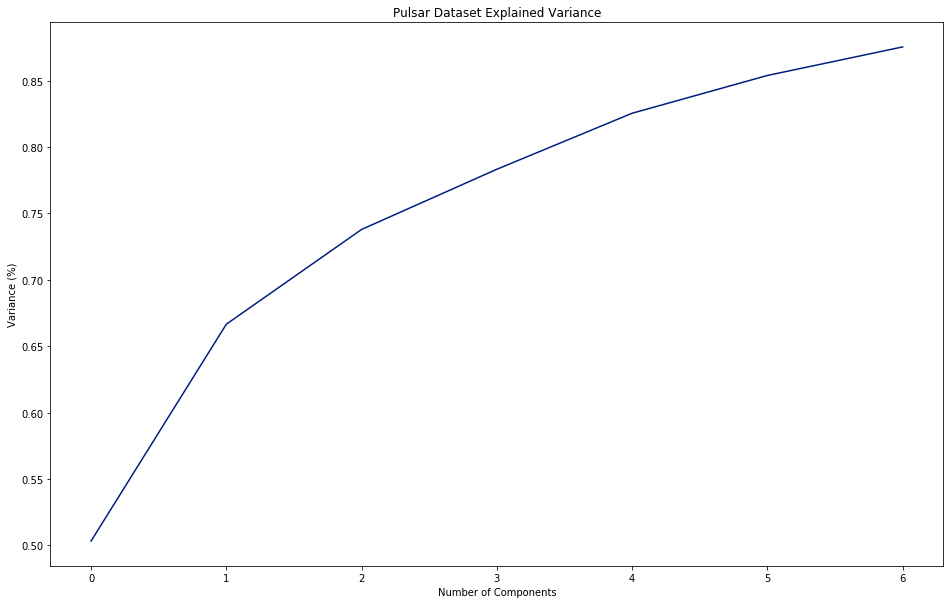

In [23]:
#Plotting the Cumulative Summation of the Explained Variance
plt.rcParams['figure.figsize'] = [16, 10]
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [24]:
finalDf = pd.concat([principalDf, df[['player_position']]], axis = 1)
finalDf = finalDf[finalDf.player_position != '0']
#finalDf = finalDf[finalDf['principal component 1'] < 6]

In [25]:
finalDf = pd.concat([finalDf, df[['club']]], axis = 1)
finalDf = pd.concat([finalDf, df[['value_eur']]], axis = 1)
finalDf = pd.concat([finalDf, df[['player_position_value']]], axis = 1)
finalDf = pd.concat([finalDf, df[['short_name']]], axis = 1)
finalDf = pd.concat([finalDf, df[['year']]], axis = 1)

In [26]:
finalDf = finalDf.dropna()
finalDf = finalDf.drop_duplicates(subset='short_name', keep="last")
finalDf = finalDf.loc[finalDf['short_name'] != '0']
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,player_position,club,value_eur,player_position_value,short_name,year
197,-7.10,-2.10,0.56,-1.50,2.73,-0.15,-0.89,ST,Tottenham Hotspur,31000000,6,Lucas Moura,19/20
254,-6.27,-1.35,2.27,-2.84,1.00,-0.33,0.75,ST,Athletic Club de Bilbao,29000000,6,Iñaki Williams,19/20
327,-2.94,3.91,0.26,-1.28,1.88,-0.20,1.23,CB,Uruguay,0,2,E. Schetino,19/20
328,-6.87,-2.09,2.19,0.29,1.54,-0.13,0.44,CM,Uruguay,0,4,J. Sildero,19/20
353,-6.20,-1.93,2.69,-0.56,0.91,-0.08,0.09,ST,Borussia Mönchengladbach,22000000,6,A. Plea,19/20
407,-3.75,3.37,1.62,-1.33,0.53,-0.14,-1.11,CB,Uruguay,0,2,J. Frendado,19/20
408,-5.15,-4.14,0.89,1.53,2.53,-0.18,1.14,CM,Uruguay,0,4,S. Ardero,19/20
409,-4.27,-1.65,4.26,-2.51,-0.23,-0.45,0.08,ST,Uruguay,0,6,L. Dálves,19/20
410,-3.52,-1.87,3.80,-2.61,-0.93,-0.75,1.63,ST,Ecuador,0,6,S. Mandíquez,19/20
417,-4.53,3.39,0.39,-0.88,2.08,-0.16,0.08,CB,Atlético Madrid,19000000,2,Mario Hermoso,19/20


In [27]:
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,player_position,club,value_eur,player_position_value,short_name,year
197,-7.10,-2.10,0.56,-1.50,2.73,-0.15,-0.89,ST,Tottenham Hotspur,31000000,6,Lucas Moura,19/20
254,-6.27,-1.35,2.27,-2.84,1.00,-0.33,0.75,ST,Athletic Club de Bilbao,29000000,6,Iñaki Williams,19/20
327,-2.94,3.91,0.26,-1.28,1.88,-0.20,1.23,CB,Uruguay,0,2,E. Schetino,19/20
328,-6.87,-2.09,2.19,0.29,1.54,-0.13,0.44,CM,Uruguay,0,4,J. Sildero,19/20
353,-6.20,-1.93,2.69,-0.56,0.91,-0.08,0.09,ST,Borussia Mönchengladbach,22000000,6,A. Plea,19/20


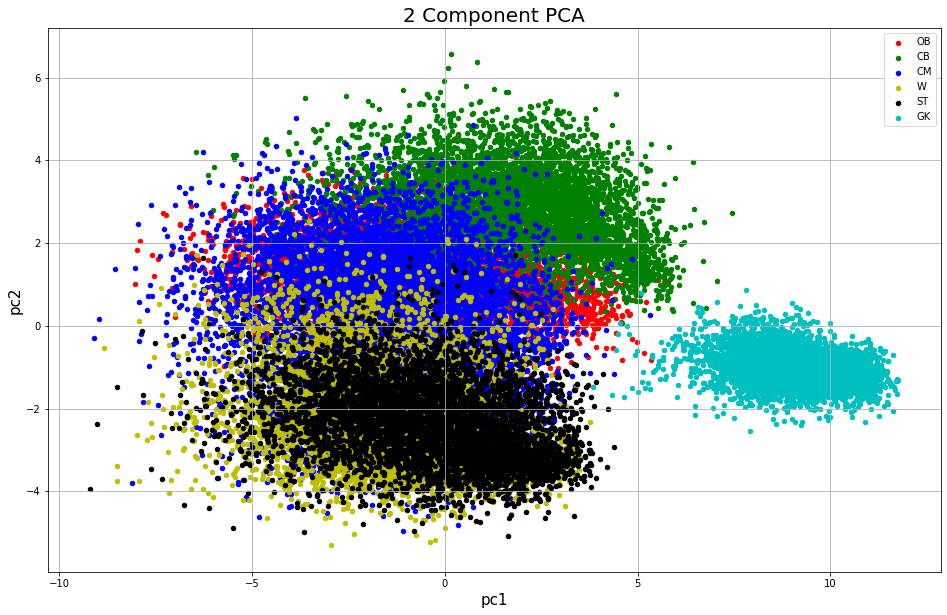

In [28]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['OB', 'CB', 'CM', 'W', 'ST', 'GK']
colors = ['r', 'g', 'b', 'y','k','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['player_position'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

In [29]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

#kmeans = KMeans(n_clusters=7)

clusters = km.fit(principalDf)
y_km = km.fit_predict(principalDf)

In [30]:
finalDf['cluster'] = pd.Series(clusters.labels_, index=None)
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,player_position,club,value_eur,player_position_value,short_name,year,cluster
197,-7.10,-2.10,0.56,-1.50,2.73,-0.15,-0.89,ST,Tottenham Hotspur,31000000,6,Lucas Moura,19/20,2
254,-6.27,-1.35,2.27,-2.84,1.00,-0.33,0.75,ST,Athletic Club de Bilbao,29000000,6,Iñaki Williams,19/20,2
327,-2.94,3.91,0.26,-1.28,1.88,-0.20,1.23,CB,Uruguay,0,2,E. Schetino,19/20,5
328,-6.87,-2.09,2.19,0.29,1.54,-0.13,0.44,CM,Uruguay,0,4,J. Sildero,19/20,2
353,-6.20,-1.93,2.69,-0.56,0.91,-0.08,0.09,ST,Borussia Mönchengladbach,22000000,6,A. Plea,19/20,2


In [31]:
finalDf['cluster'].value_counts()

4    7021
1    6701
3    5500
2    4737
5    4070
0    3555
Name: cluster, dtype: int64

In [32]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

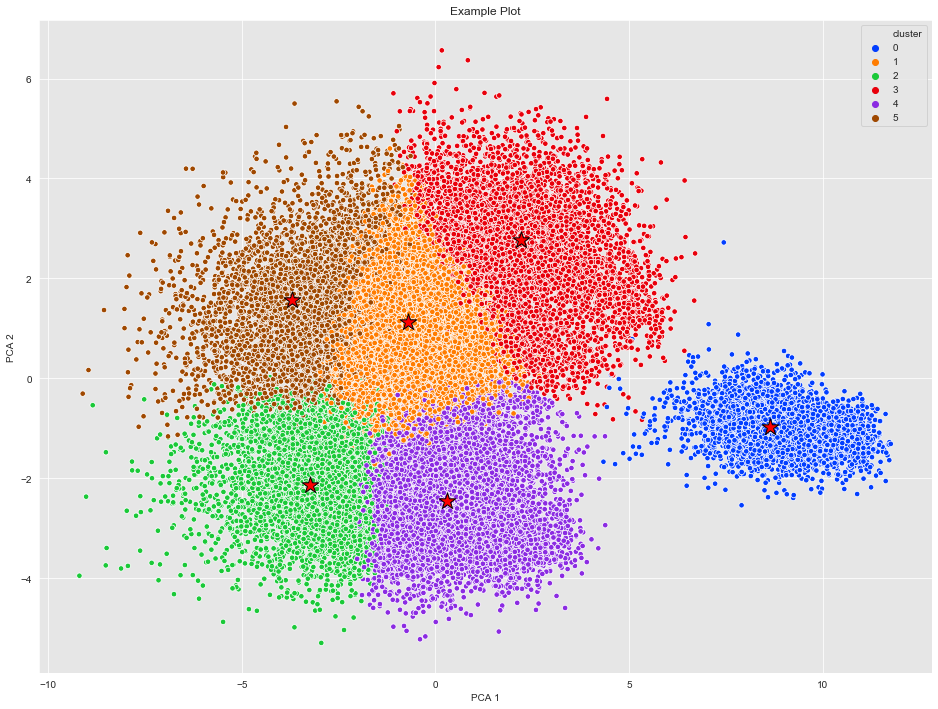

In [33]:
palette = sns.color_palette("bright", 6)  #Choosing color
plt.figure(figsize=(16, 12))

g = sns.scatterplot(x="pc1", y="pc2", palette=palette, hue = 'cluster', s=30, data=finalDf)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title('Example Plot')
# Set x-axis label
plt.xlabel('PCA 1')
# Set y-axis label
plt.ylabel('PCA 2')

plt.show()

In [34]:
label = finalDf['cluster']

In [35]:
features=list(zip(finalDf['pc1'],finalDf['pc2']))

In [36]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[2,0]]) #GK input (should output [1])
print(predicted)

[1]


In [37]:
df_player_selection = finalDf.loc[finalDf['short_name'] == 'A. Lacazette']
df_player_selection

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,player_position,club,value_eur,player_position_value,short_name,year,cluster
67890,-6.70,-2.19,2.54,-1.34,1.36,-0.42,-0.09,ST,Arsenal,36500000,6,A. Lacazette,18/19,2


In [38]:
df_player_pca = df_player_selection[['pc1', 'pc2']].to_numpy()
df_player_pca

array([[-6.69699707, -2.18609204]])

In [39]:
predicted= model.predict(df_player_pca)
print(predicted)

[2]


In [40]:
#Importing KDTree

from sklearn.neighbors import KDTree

kdt = KDTree(finalDf[['pc1', 'pc2']])

In [41]:
#Using KDTree to find 3 articles similar to that of Ederson

dist, idx = kdt.query(finalDf[['pc1', 'pc2']][finalDf['short_name']=='A. Lacazette'], k=5)

In [42]:
print(finalDf['short_name'].iloc[idx[0,1]])
print(finalDf['short_name'].iloc[idx[0,2]])
print(finalDf['short_name'].iloc[idx[0,3]])
print(finalDf['short_name'].iloc[idx[0,4]])

Willian
E. Lavezzi
M. Rashford
José Callejón


In [43]:
#Importing KDTree

from sklearn.neighbors import KDTree

kdt = KDTree(finalDf[['pc1', 'pc2']])

#Using KDTree to find 5 articles similar to that of input

dist, idx = kdt.query(finalDf[['pc1', 'pc2']][finalDf['short_name']=='A. Lacazette'], k=5)

nn_df = pd.DataFrame()

nn_df = nn_df.append(finalDf[['short_name', 'club', 'player_position', 'pc1', 'pc2', 'cluster', 'value_eur']].iloc[idx[0,1]])
nn_df = nn_df.append(finalDf[['short_name', 'club', 'player_position', 'pc1', 'pc2', 'cluster', 'value_eur']].iloc[idx[0,2]])
nn_df = nn_df.append(finalDf[['short_name', 'club', 'player_position', 'pc1', 'pc2', 'cluster', 'value_eur']].iloc[idx[0,3]])
nn_df = nn_df.append(finalDf[['short_name', 'club', 'player_position', 'pc1', 'pc2', 'cluster', 'value_eur']].iloc[idx[0,4]])
nn_df['cluster'] = nn_df['cluster'].astype(str)
nn_df['cluster'] = nn_df['cluster'].str.split('.').str[0]
nn_df

,club,cluster,pc1,pc2,player_position,short_name,value_eur
67907,Chelsea,2,-6.69,-2.19,W,Willian,"30,500,000.00"
68402,Hebei China Fortune FC,2,-6.68,-2.19,ST,E. Lavezzi,"8,000,000.00"
68078,Manchester United,2,-6.69,-2.23,W,M. Rashford,"26,500,000.00"
67910,Napoli,2,-6.61,-2.20,W,José Callejón,"27,500,000.00"


In [44]:
nn_mean = nn_df[['pc1', 'pc2']].mean()
print(nn_mean[0])
print(nn_mean[1])

-6.668257883250297
-2.203148481311107


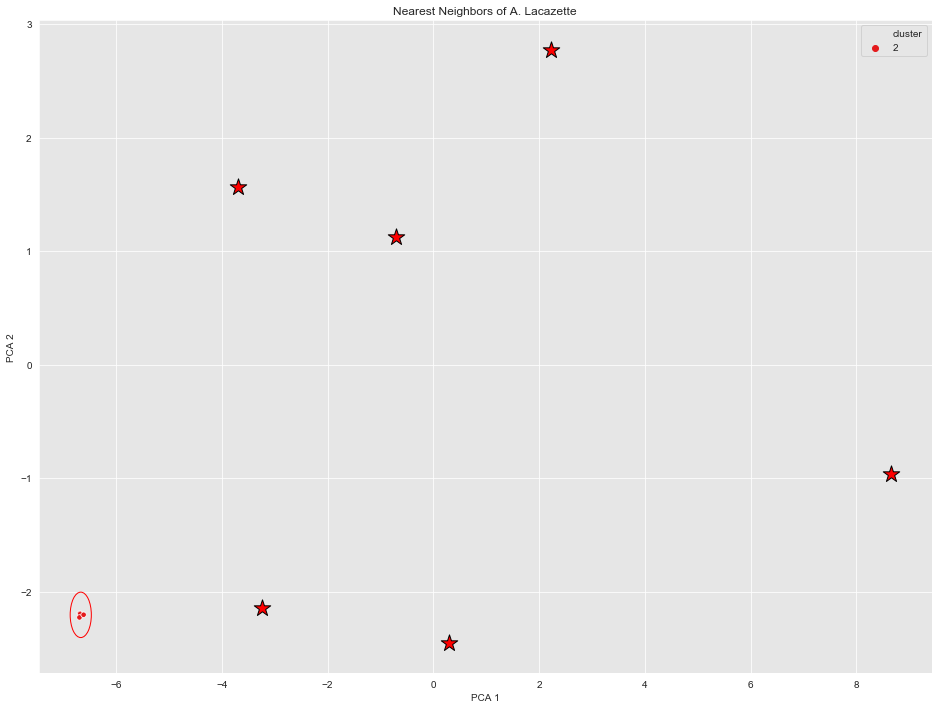

In [45]:
palette = sns.color_palette("Set1", 1)  #Choosing color
plt.figure(figsize=(16, 12))

circle1 = plt.Circle((nn_mean[0], nn_mean[1]), 0.2, color='r', fill=False)

ax = sns.scatterplot(x="pc1", y="pc2", palette=palette, hue = 'cluster', s=30, data=nn_df)
ax.add_artist(circle1)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)


plt.title('Nearest Neighbors of ' + finalDf['short_name'].iloc[idx[0,0]])

# Set x-axis label
plt.xlabel('PCA 1')
# Set y-axis label
plt.ylabel('PCA 2')

#plt.xlim(-7, 6)
#plt.ylim(-4, 4)
plt.show()

In [46]:
df_pca = finalDf[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name','club']]
df_pca = df_pca[df_pca.value_eur != 0]

In [47]:
df_pca.sort_values(by=['value_eur'], ascending=False)

,pc1,pc2,pc3,pc4,pc5,pc6,value_eur,short_name,club
50170,-7.94,-3.75,2.06,-0.18,2.88,-0.34,123000000,Neymar,Paris Saint-Germain
67762,-8.51,-3.74,2.15,0.18,3.40,-0.19,118500000,Neymar Jr,Paris Saint-Germain
67761,-9.19,-3.95,2.94,0.16,3.42,-0.13,110500000,L. Messi,FC Barcelona
67764,-9.11,-0.30,3.01,1.22,2.35,0.17,102000000,K. De Bruyne,Manchester City
67768,-8.49,-3.39,2.16,0.17,2.97,-0.22,93000000,E. Hazard,Chelsea
67775,-8.12,-3.80,2.75,-0.59,2.31,0.02,89000000,P. Dybala,Juventus
67777,-7.66,-0.97,1.39,1.69,2.58,-0.19,83000000,Isco,Real Madrid
67779,-8.51,-1.48,2.27,-1.58,2.31,-0.16,78000000,A. Griezmann,Atlético Madrid
67774,-7.83,-1.66,4.32,-1.85,1.09,-0.13,77000000,R. Lewandowski,FC Bayern München
67760,-9.02,-2.37,4.29,-2.83,2.16,-0.21,77000000,Cristiano Ronaldo,Juventus


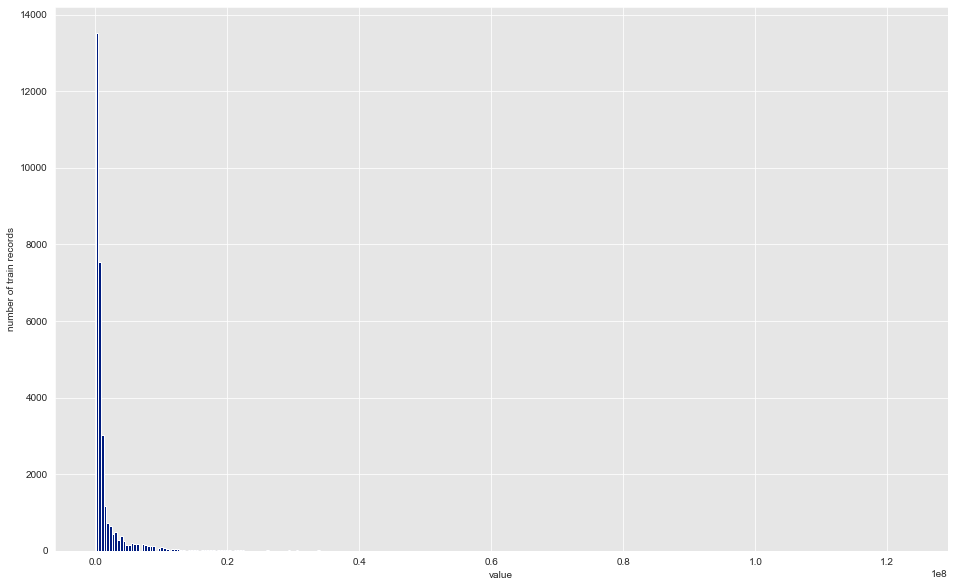

In [48]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(df_pca['value_eur'], bins=300)
plt.xlabel('value')
plt.ylabel('number of train records')
plt.show()

In [49]:
df_pca['log_value'] = np.log(df_pca[['value_eur']])

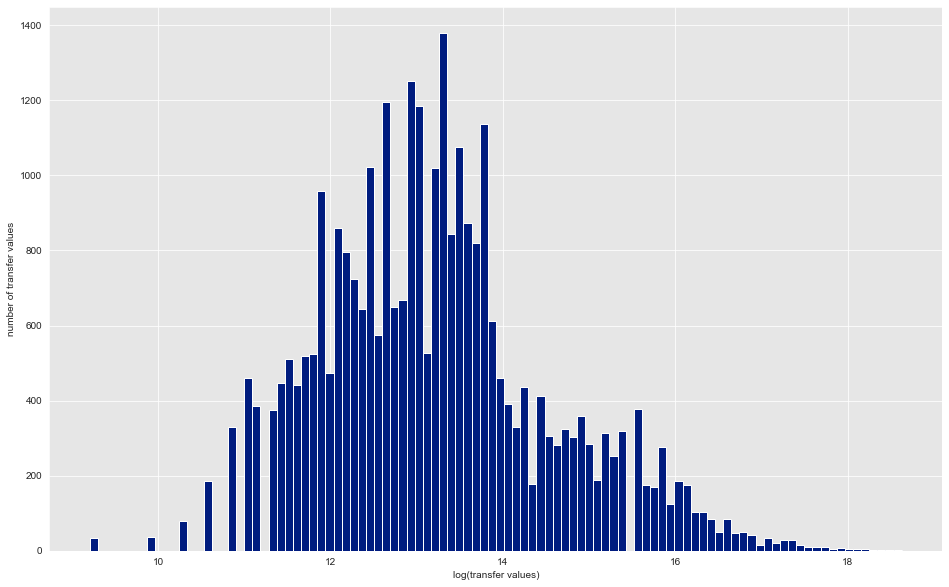

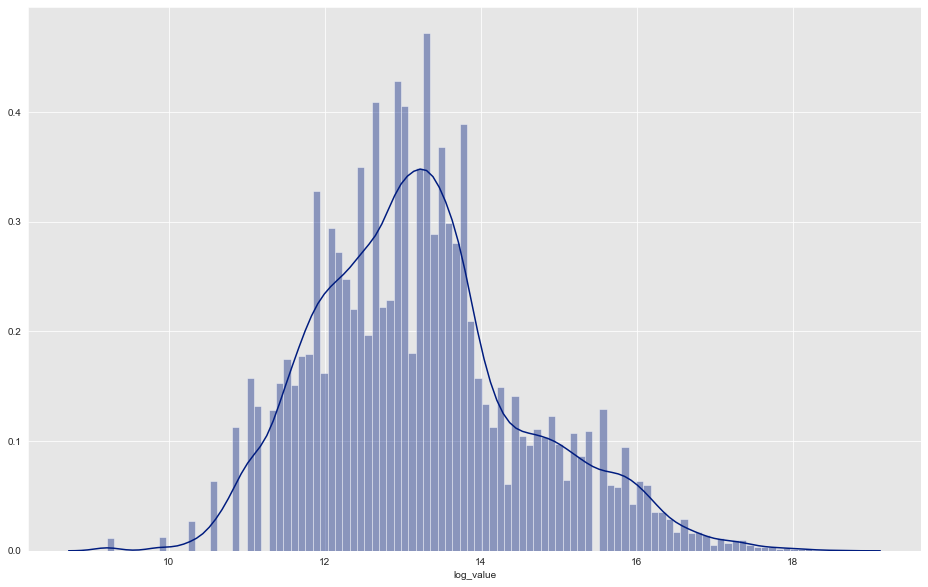

In [50]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(df_pca['log_value'] .values, bins=100)
plt.xlabel('log(transfer values)')
plt.ylabel('number of transfer values')
plt.show()
sns.distplot(df_pca['log_value'] , bins =100)

In [51]:
selection = nn_df.index.to_list()
selection

[67907, 68402, 68078, 67910]

In [52]:
Train_Master = df_pca.drop(['value_eur', 'club', 'short_name'], axis=1)
Test_Master = df_pca.drop(['log_value','value_eur', 'club', 'short_name'], axis=1)

In [53]:
Train_Master.shape, Test_Master.shape

((31023, 7), (31023, 6))

In [54]:
Train, Test = train_test_split(Train_Master[0:100000], test_size = 0.2)

In [55]:
X_train = Train.drop(['log_value'], axis=1)
Y_train = Train["log_value"]
X_test = Test.drop(['log_value'], axis=1)
Y_test = Test["log_value"]

In [56]:
Test_Selection = Test_Master.loc[Test_Master.index.isin(selection)]

In [57]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_Selection)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [58]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

[0]	train-rmse:6.44961	valid-rmse:6.46617
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 2 rounds.
[1]	train-rmse:3.27928	valid-rmse:3.2938
[2]	train-rmse:1.73367	valid-rmse:1.74687
[3]	train-rmse:1.02331	valid-rmse:1.03845
[4]	train-rmse:0.721554	valid-rmse:0.740529
[5]	train-rmse:0.615411	valid-rmse:0.638489
[6]	train-rmse:0.580469	valid-rmse:0.605126
[7]	train-rmse:0.564567	valid-rmse:0.591117
[8]	train-rmse:0.555867	valid-rmse:0.584832
[9]	train-rmse:0.549249	valid-rmse:0.581255
Modeling RMSLE 0.58125


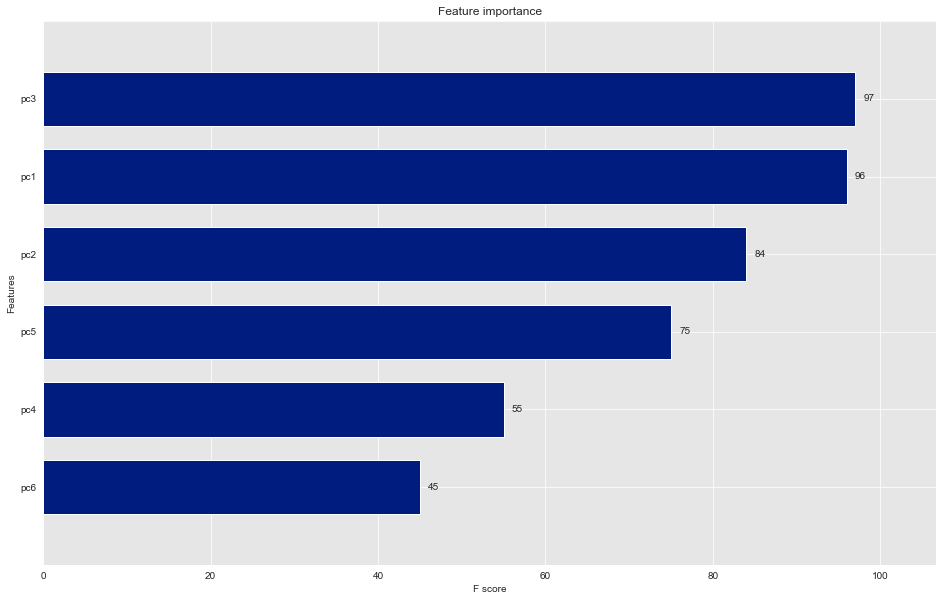

In [59]:
xgb.plot_importance(model, max_num_features=28, height=0.7)

In [60]:
pred = model.predict(dtest)
pred = np.exp(pred) - 1

In [61]:
Test_Selection = Test_Selection.reset_index()

In [62]:
df_test = pd.concat([Test_Selection, pd.DataFrame(pred, columns=['pred_value'])], axis=1)
df_test

,index,pc1,pc2,pc3,pc4,pc5,pc6,pred_value
0,67907,-6.69,-2.19,0.65,1.96,2.62,0.03,"22,128,236.00"
1,67910,-6.61,-2.20,1.09,-1.02,2.01,-0.28,"24,772,712.00"
2,68078,-6.69,-2.23,1.54,-0.76,0.97,-0.17,"20,914,696.00"
3,68402,-6.68,-2.19,1.63,-0.92,1.73,-0.08,"24,772,712.00"


In [63]:
df_predictions = pd.merge(df_test, df_pca, how='left', left_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'], right_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']).sort_values(by=['value_eur'], ascending=False)
df_predictions['value_eur'] = df_predictions['value_eur'].astype('float')
df_predictions

,index,pc1,pc2,pc3,pc4,pc5,pc6,pred_value,value_eur,short_name,club,log_value
0,67907,-6.69,-2.19,0.65,1.96,2.62,0.03,"22,128,236.00","30,500,000.00",Willian,Chelsea,17.23
1,67910,-6.61,-2.20,1.09,-1.02,2.01,-0.28,"24,772,712.00","27,500,000.00",José Callejón,Napoli,17.13
2,68078,-6.69,-2.23,1.54,-0.76,0.97,-0.17,"20,914,696.00","26,500,000.00",M. Rashford,Manchester United,17.09
3,68402,-6.68,-2.19,1.63,-0.92,1.73,-0.08,"24,772,712.00","8,000,000.00",E. Lavezzi,Hebei China Fortune FC,15.89
